In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

# Seek market analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter

#set seaborn style
sns.set()
sns.set_style("whitegrid")

C:\Users\Thao My\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Thao My\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Part 1

## Load seek job market data and view the dataframe

In [8]:
%%capture --no-display --no-stdout
df = pd.read_csv('C:/Users/Thao My/data.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(10)

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


#### Getting the date range of the dataset

In [9]:
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = dates[0]
end_date = dates[len(dates)-1]

#### Getting the number of variations for each attribute

In [10]:
_ids = df['Id'].nunique()
_titles = df['Title'].nunique()
_companies = df['Company'].nunique()
_dates = df['Date'].nunique()
_locations = df['Location'].nunique()
_area = df['Area'].nunique()
_classes = df['Classification'].nunique()
_subclasses = df['SubClassification'].nunique()
_requirements = df['Requirement'].nunique()
_description = df['FullDescription'].nunique()
_lowest_salary = df['LowestSalary'].nunique()
_highest_salary = df['HighestSalary'].nunique()
_job_type = df['JobType'].nunique()

<h1>Dataset Description</h1>

<p>The data set consists of 318477 job postings from seek.com from the 1st of October 2018 - 13th of March 2019. There are 13 attributes that make up an entry, and at first glance it looks as though there will be missing data from certain attributes throughout the dataset. Missing data and dataypes will be further investigated in the next step of the analysis in order to perform data preprocessing and cleaning.</p>

<p><b>The 13 attributes that make up a job post, and the size of variation of each are as follows:</b></p>
<table>
  <tr>
    <th>Attribute</th>
    <th>No. of Variations</th>

  </tr>
  <tr>
    <td>ID</td>
    <td>318477</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>168065</td>
  </tr>
  <tr>
    <td>Company</td>
    <td>40628</td>
  </tr>
  <tr>
    <td>Date</td>
    <td>163</td>
  </tr>
  <tr>
    <td>Location</td>
    <td>65</td>
  </tr>
  <tr>
    <td>Area</td>
    <td>19</td>
  </tr>
  <tr>
    <td>Classification</td>
    <td>30</td>
  </tr>
      <tr>
    <td>Sub-Classification</td>
    <td>338</td>
  </tr>
  <tr>
    <td>Requirements</td>
    <td>234287</td>
  </tr>
  <tr>
    <td>Full Description</td>
    <td>250901</td>
  </tr>
  <tr>
    <td>Highest Salary</td>
    <td>11</td>
  </tr>
  <tr>
    <td>Lowest Salary</td>
    <td>11</td>
  </tr>
    <tr>
        <td>Job Type</td>
        <td>4</td>
    </tr>
</table>

<ul>
    <li>The number of different ID's is obviously equal to the size of the dataset as the ID uniquely identifies a particular job post. As the purpose of this analysis is to get an overall view of the Job Market in Australia, we won't need to uniquely identify individual job posts using the ID column. Since the ID does not provide any other information that would be useful for analysis, it can be safely disregarded and removed from the dataset.</li><br>
<li> The number of variataions for job title, requirements and full description is quite large as well, which indicates that there does not seem to be a uniform standard of choosing job titles. Given the fact that those attributes are in textual format that can't be divided into categories, and having such a large number of different titles, requirements and descriptions leads to believe that there won't be much information that can be extracted from the column, however, we do not want to exclude the column at this stage yet. </li><br>
<li> The number of different companies is still large with ~40.000 variations. The information can be used to extract the most popular companies for specific locations or Job sectors.</li><br>
<li> There are 163 different dates, which cover the date range of the datasets job posts from the 1st of October 2018 - 13th of October 2019</li><br>
<li> Classification and Location are categorical variables, which have variation sizes of 30 and 65, seem to provide interesting information to analyse the spatial distribution and popular job sectors within Australia. SubClassification is also a categorical variable, which further divides each Classification into more specific sections.</li><br>
    <li>Area is a categorical variable that divides a location into smaller areas, and has 19 variations. At a first glance it seems like only the main cities such as Brisbane, Sydney and Melbourne have a value for Area, however, we will investigate the attribute further during analysis. </li><br>
<li>Lowest and Highest Salary are numerical variables with 11 different ranges, which will be used for analysis with respect to Location and Classification, in order to see where employees are paid better and what job sectors have the best potential to earn high salaries.</li><br>
<li> There are 4 job types, and the attribute can be used to determine whether there is a relationship between salaries and job type</li>


-----

### Data Preparation and Preprocessing

-----
#### Remove Id column
<p><i> As mentioned above, the ID column of the dataset represents arbitrary values, most likely used by the Seek website itself to uniquely identify postings. As this functionality is not required for this analysis, the column does not present any meaningful data for analysis and will therefore be dropped. </i></p>

In [11]:
print("\nRemoval of Id column reduces attributes in dataset from ", df.shape[1], end="")
df.drop('Id', axis=1, inplace=True)
print(" to ", df.shape[1])


Removal of Id column reduces attributes in dataset from  13 to  12


#### Check Data Types

In [12]:
df.dtypes

Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

#### Convert date column to datetime
<p> Conversion of Date strings to datetime datatypes allows for more accurate representation of our data. Furthermore, it will allow us to manipulate the date attribute to analyse the data with respect to particular days, weeks, months etc.</p>

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

datetime64[ns, UTC]

<p><i>Date column now consists of Datetime values and the dataset itself has had it's size reduced, clearing clutter and alleviating computing strain for future analysis.</i></p>

-----

### Check for Duplicates and Missing Data

#### Duplicates

In [14]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)

Duplicates found:  8607
Additional duplicates found without regard to timestamp:  6724


#### Missing Data

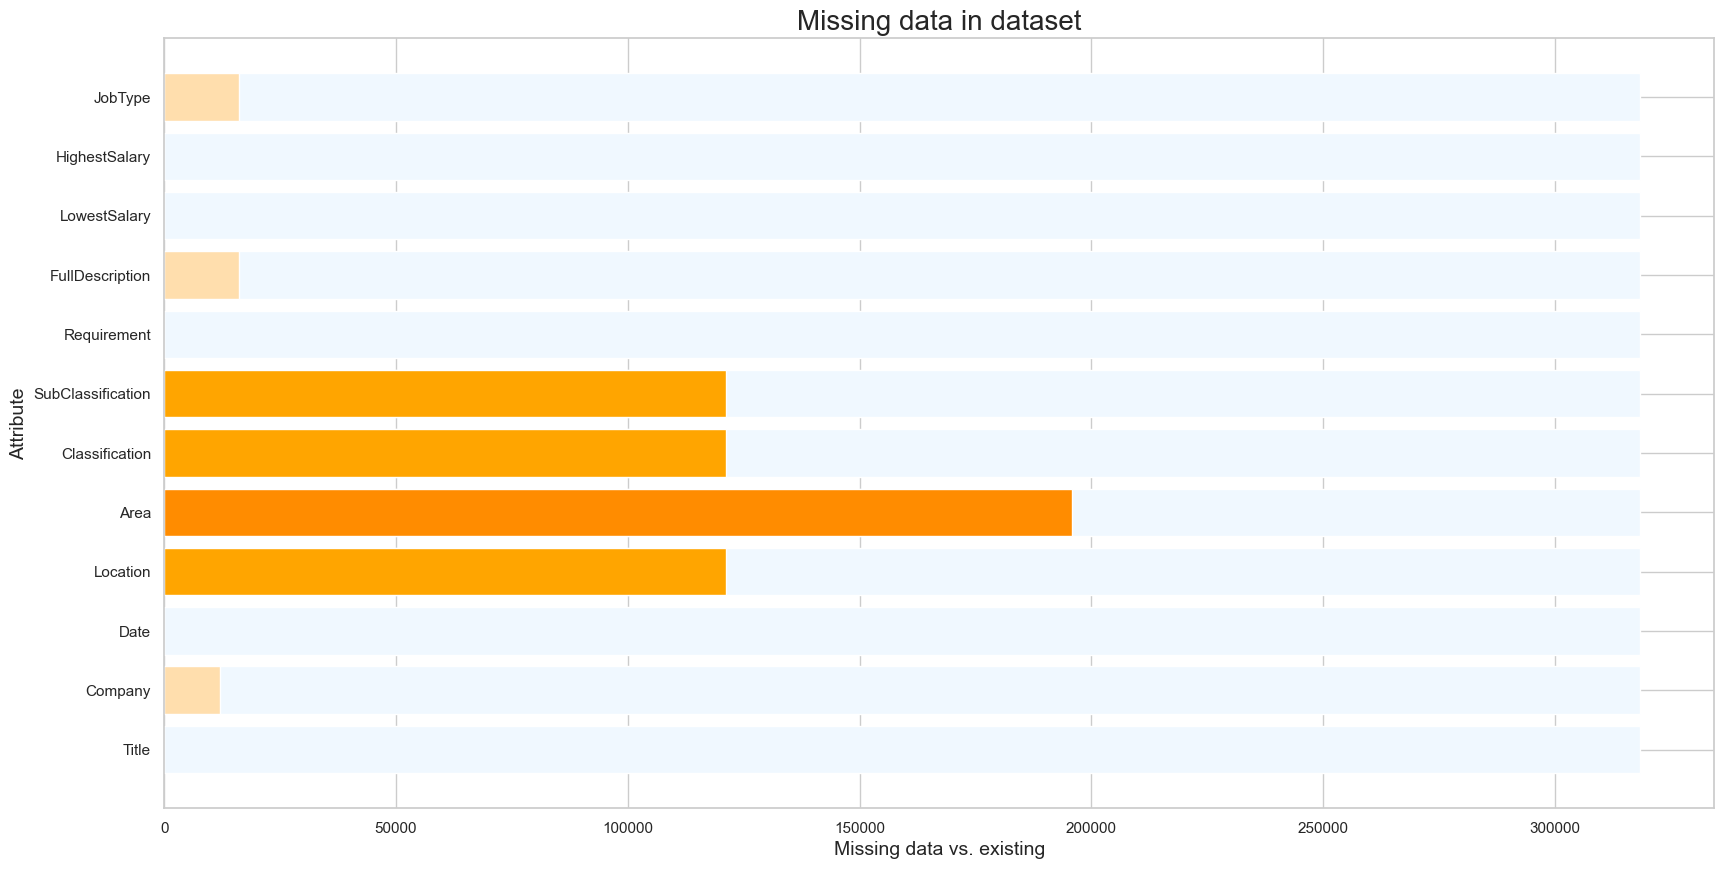

In [15]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();


In [16]:
tot = df.shape[0]

print('Attributes with missing data: ')
for i in range(len(nulls)):
    if(nulls[i] > 0):
        print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / tot) * 100))

Attributes with missing data: 
    Company: 3.77%
    Location: 38.07%
    Area: 61.49%
    Classification: 38.07%
    SubClassification: 38.07%
    Requirement: 0.00%
    FullDescription: 5.08%
    JobType: 5.05%


C:\Users\Thao My\AppData\Local\Temp\ipykernel_22608\1102213639.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(nulls[i] > 0):
C:\Users\Thao My\AppData\Local\Temp\ipykernel_22608\1102213639.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / tot) * 100))


<p><i>Area is the most notable attribute with missing data. As mentioned earlier, it is suspected that only larger citites contain a value for Area and the column should therefore be investigated further as part of data preprocessing</i></p>
<p><i>Similarly, <b>Classification</b>, <b>SubClassification</b> and <b>Location</b> of job postings is regularly void with a consistent 38.07% across the three. These exact figures indicate that this is no mere coincidence and that this phenomenon should be investigated further</i></p>

#### Investigate Area column in order to determine whether the suspition that only job posts for larger citites contain an Area proves to be correct

In [17]:
df_area = df[(df['Area'].isna()==False) & (df['Location'].isna()==False)]
print(df_area['Location'].unique())

['Sydney' 'Brisbane' 'Melbourne' 'Perth']


#### Investigate missing data in Classification, SubClassification and Location column

In [18]:
df_missing_data = df[(df['Classification'].isna()==True)&(df['SubClassification'].isna()==True)&(df['Location'].isna()==True)]
missing_data_dates = df_missing_data.sort_values('Date')['Date'].dropna().unique()
missing_data_start = missing_data_dates[0]
print(missing_data_start)
missing_data_end = missing_data_dates[len(missing_data_dates)-1]
print(missing_data_end)

2018-12-16 00:00:00+00:00
2019-03-13 00:00:00+00:00


In [19]:
df_missing_data.sort_values('Date').head(3)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
219272,Network Engineer,Sonic Human Resourcing Pty Ltd,2018-12-16 00:00:00+00:00,NaN,NaN,NaN,NaN,We seek a Network Engineer to provide backfill...,<p>Our client is seeking a Network Engineer to...,150,200,Contract/Temp
219193,SharePoint Developer,Clicks IT Recruitment,2018-12-16 00:00:00+00:00,NaN,NaN,NaN,NaN,Looking for a PHP Developer who is experience ...,<p><strong>You will have:</strong></p>\n ...,150,200,Contract/Temp
219192,Experienced Commercial Painter & Decorator,Heritage Wallpaper Pty Ltd,2018-12-16 00:00:00+00:00,NaN,NaN,NaN,NaN,Experienced Commercial Painter & Decorator,<p>Experienced Commercial Painter &amp; Decora...,150,200,Full Time


In [20]:
#double check if there are any rows in the above date range have data for the 4 attributes at question
mask = (df['Date'] > missing_data_start) & (df['Date'] <= missing_data_end)
temp = df.loc[mask]
print(len(temp[(temp['Classification'].isna()==False) & (temp['SubClassification'].isna()==False) & (temp['Location'].isna()==False) & (temp['Area'].isna()==False)]))

0


#### Check how much missing data for date range before 16-12-2018

In [21]:
df_reduced = df[df['Date'] < missing_data_start]
print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

Location             0
Classification       0
SubClassification    0
dtype: int64


<h1>Data Preparation and Preprocessing Summary</h1>

<p> The dataset, which was originally in .csv format has been loaded into a Data Frame using the <b>read_csv()</b> function of the Pandas Library. As mentioned above, the ID column will be excluded from the analysis as it doesn't provide any useful information and the column has therefore been removed from the Data Frame as part of the data cleaning process. The following additional preprocessing/data cleaning steps have been performed:</p>

<b>Data Types</b>
<ul>
    <li>The date column originally had the general <i>object</i> data type and has therefore been converted to its appropriate <i>datetime</i> data type, so that it can be used for data manipulation.</li>
    <li>The salary range data attributes are numerical variables and have been correctly assigned the int64 data type</li>
    <li>All other attributes are textual information and have correctly been assigned the object data type.</li>
</ul>

<b>Duplicate Data</b>
<ul>
    <li>There are 8607 exact duplicates found within the dataset, these will be removed as identical job postings posted at the same time cannot safely be considered separate roles and is in turn considered dirty data.</li>
    <li>An additional 6724 duplicate postings were found that were posted at a different date, but with all other attributes being identical. This requires further consideration as it could mean that a job position wasn't filled and therefore the job was reposted or, it could describe a scenario where, for example, a company may have later found additional capacity for another employee to fill an existing job description, which still yields meaningful data to this analysis. For that reason, those duplicates have not yet been removed from the Data Frame.</li>
</ul>

<b>Missing Data</b>
<p> The table above shows the number of missing data for each attribute, relative to the total amount of data</p>
<ul>
    <li>The most notable attribute is the <b>Area</b> of jobs being missing from the posting in over 61% of the data. One of the reasons is, that only 4 out of 65 locations have specified an Area as part of a job post, which are Sydney, Melbourne, Brisbane and Perth. This also leads to the early observation that those cities make up at least 39% of the dataset.</li>
    <li><b>Classification</b>, <b>SubClassification</b> and <b>Location</b> of job postings is regularly void with a consistent 38.07% across the three. After further investigation, it seems that values for those attributes for any jobposts between <b>16-12-2018</b> and <b>13-03-2019</b> are missing. This means, that when analysing the dataset by <b>Location, Classification & Subclassification</b> the data actually only covers a date range from the <b>1st of October 2018 - 16th of December 2018</b> </li>
    <li>Lastly, we found <b>Company</b>, <b>Requirement</b>, <b>FullDescription</b> and <b>JobType</b> attributes containing reasonable amounts of null data. They are listed here simply to highlight the precaution that must be taken when drawing future conclusions with the data from these attributes.</li>
</ul>

<h1>Hypothesis</h1>

<ul>
    <li>We expect the vast majority of jobs to be concentrated along the coast lines of Australia, particularly the East Coast, in accordance with the population distribution. Specific locations that we expect to hold a large share of the market are major cities such as Sydney, Melbourne, Brisbane, Adelaide and Perth.</li>
    <li>We suspect that the major classifications in Australia include IT, due to the increasing amount of technology being developed and used, and Tourism, as Australia is a popular holiday spot. Other classifications that may stand out could be Farming and Agriculture as those are quite large industries in Australia, as well as Mining. However, the latter would rather be concentrated inland and in remote locations. Furthermore, many businesses in the Agricultural industry are often family based and find employees through 'word of mouth' which means the amount of job posts may not accurately represent the size of the industry/number of jobs available.</li>
    <li>The jobs that we suspect to have high salaries include jobs in the IT industry, Health, management positions, government jobs and mining jobs.</li>
    <li>As we suspect larger cities to have a larger demand for employees, we would expect the salary in those locations to be higher/more competitive as well.</li>

# Part 2: Data Analysis and Interpretation

## Job Meta Data

In this section we will briefly show what the different Classifications, Locations, Salary Ranges and Job Types that constitute a Job Advertisement are. However, we will not go in too much detail and only mention a few first observations, as we will go into more detail in subsequent stages of the Analysis.

### Classifications

In [22]:
classes = df['Classification'].dropna().unique()
df_classification = pd.DataFrame({"Classification":classes})
df_classification['Count'] = df_classification['Classification'].apply(lambda x: len(df[df['Classification']==x]))
df_classification = df_classification.sort_values(by='Count', ascending=False)

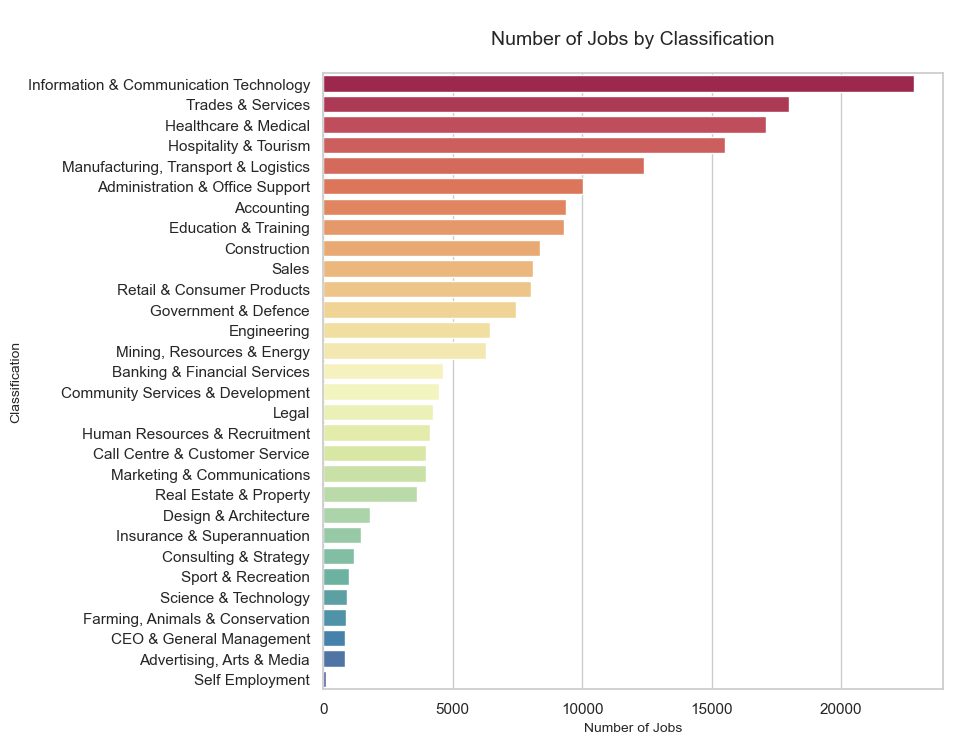

In [23]:
# Plot barplot
plt.figure(figsize=(8,8))
splot = sns.barplot(x=df_classification['Count'], y=df_classification['Classification'], palette='Spectral')
plt.title('\nNumber of Jobs by Classification\n',size=14)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('Classification', fontsize=10)

#get the color of each classification to reuse later
color_by_classification = dict()
index = 0
for i, row in df_classification.iterrows():
    color_by_classification.update({row['Classification'] : splot.patches[index].get_facecolor()})
    index += 1

plt.show()

<h3>Observation</h3>

<ul>
    <li>There are 30 different classifications</li>
    <li>The top 5 classifications with most job postings are <b>Information & Communication Technology, Trades & Services, Healthcare & Medical, Hospitality & Tourism and Manufacturing, Transport & Logistics</b></li>
        <li>Among the classifications with the lowest share of the market are <b>Self Employment, Advertising Arts & Marketing, CEO & General Manegement and Farming, Animals & Conservation</b></li>
</ul>

### Location

In [24]:
locations = df['Location'].dropna().unique()
df_location = pd.DataFrame({"Location": locations})
df_location['Count'] = df_location['Location'].apply(lambda x: pd.Series(len(df[df['Location']==x])))
df_location = df_location.sort_values(by='Count', ascending=False)

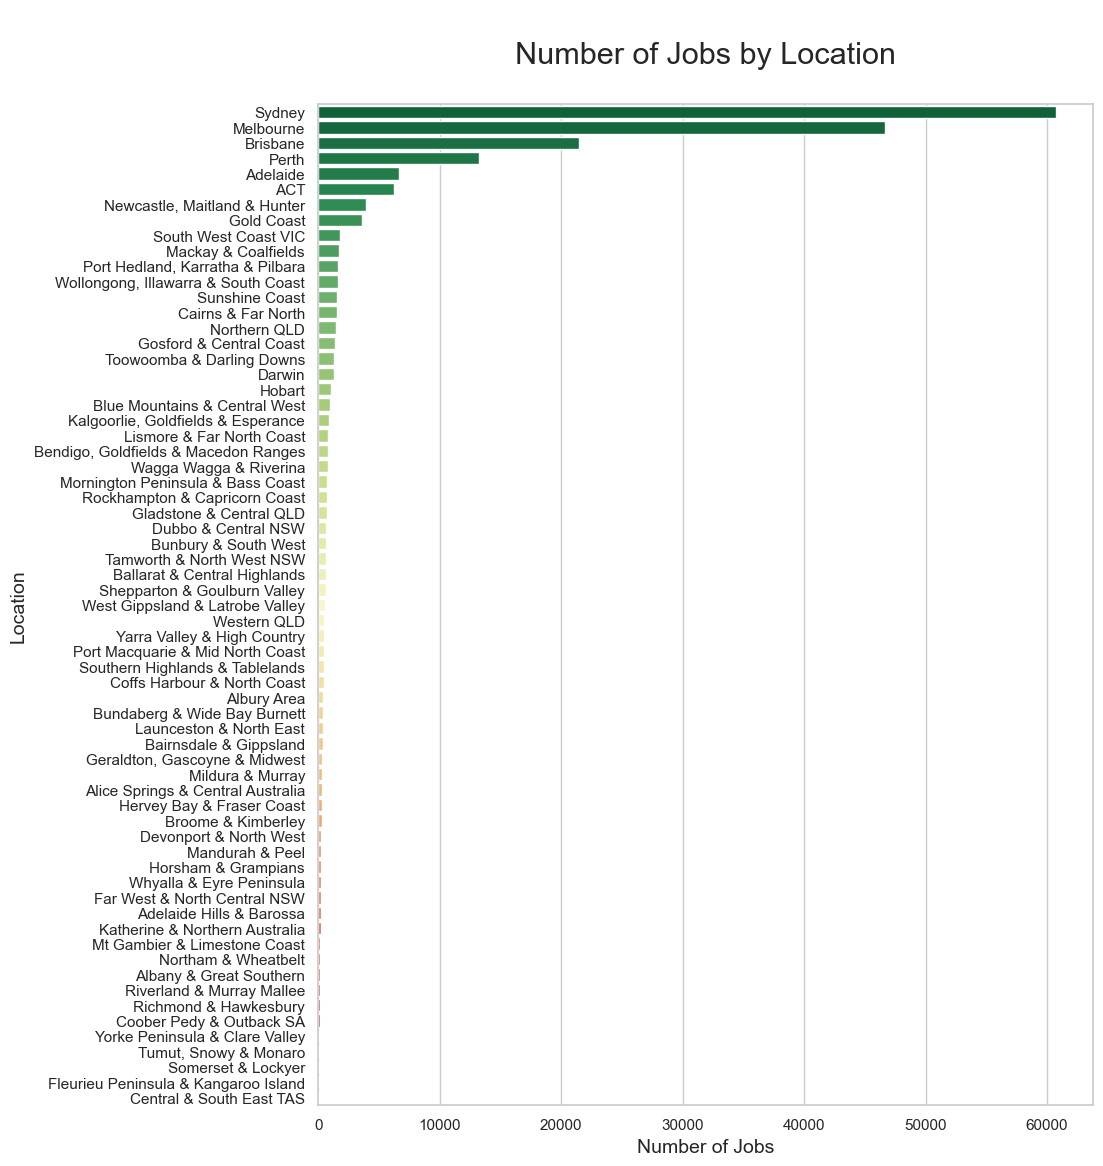

In [25]:
plt.figure(figsize=(10,13))
loc_plot = sns.barplot(x=df_location['Count'], y=df_location['Location'], palette='RdYlGn_r')
plt.title('\nNumber of Jobs by Location\n',size=22)
plt.ylabel("Location", size=14)
plt.xlabel('Number of Jobs', size=14)

#get the color of each location to reuse later
color_by_location = dict()
index = 0
for i, row in df_location.iterrows():
    color_by_location.update({row['Location'] : loc_plot.patches[index].get_facecolor()})
    index += 1
    
plt.show()

<h3>Observation</h3>

<ul>
    <li>There are 65 different Locations</li>
    <li>A Location can either be a specfic city or a larger area, region or territory such as ACT, Northern QLD etc., which needs to be considered when drawing conclusions about the spatial data distribution.</li>
    <li>The top 5 Locations are  <b>Sydney, Melbourne, Brisbane, Perth & Adelaide</b></li>
    <li>The locations with the lowest amount of job advertisements are <b>Central & South East Tasmania, Fleurieu Peninsula & Kangaroo Island, Somerset & Lockyer, Tumut, Snowy & Monaro and York Peninsula & Clare Valley</b></li>
    <li>At a first glance it seems that the jobs are concentrated around larger cities with high populations</li>
</ul>

### Salary Ranges & Job Types

In [26]:
# insert something here
low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[df['LowestSalary']==x]))
df_salary_ranges['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])

In [27]:
jobtypes = df['JobType'].dropna().unique()
df_jobtype = pd.DataFrame({"JobType": jobtypes})
df_jobtype['Count'] = df_jobtype['JobType'].apply(lambda x: pd.Series(len(df[df['JobType']==x])))

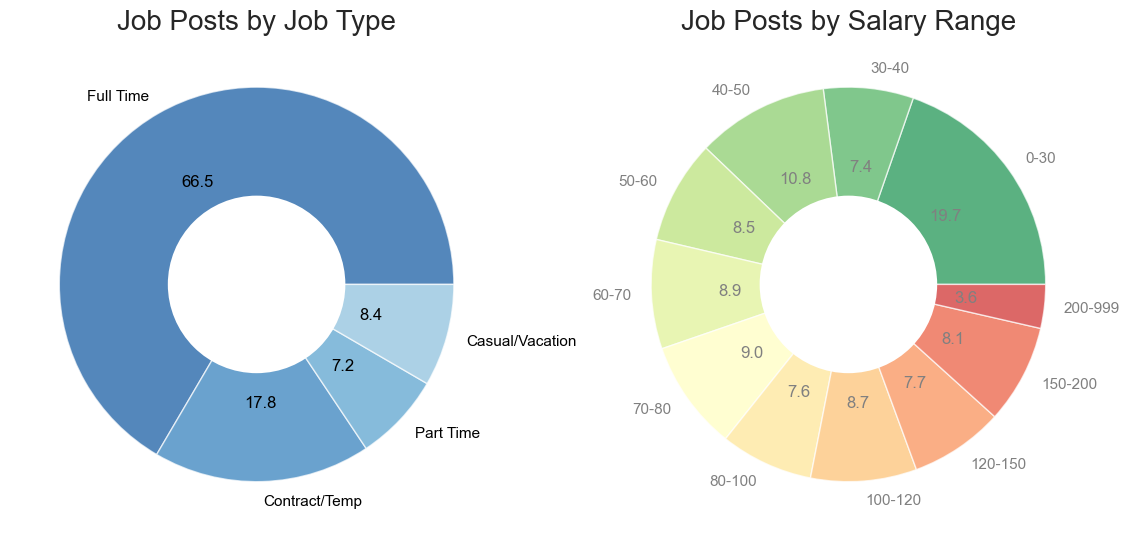

In [28]:
#create layout
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,14))

#salary ranges plot
p, texts, autotexts = ax1.pie(df_salary_ranges['Count'], colors=sns.color_palette("RdYlGn_r", len(df_salary_ranges)),labels=df_salary_ranges['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax1.title.set_text('Job Posts by Salary Range')
ax1.title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax1.add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)
    
#jobtype plot    
p2, texts2, autotexts2 = ax2.pie(df_jobtype['Count'], colors=sns.color_palette("Blues_r"),labels=df_jobtype['JobType'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax2.title.set_text('Job Posts by Job Type')
ax2.title.set_size(20)

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax2.add_patch(centre_circle2)

for t in texts2:
    t.set_color('black')
for t in autotexts2:
    t.set_color('black')
    t.set_size(12)
    
plt.show()

<h3>Observation</h3>

<div style='float:left; width:50%'>
    <h4>Job Types</h4>
    <ul>
        <li>The 4 different job types are <b>Full Time, Contract/Temporary, Part Time and Casual.</b></li>
        <li>More than 66% of Jobs are Full Time Positions, followed by almost 18% for Contract and Temporary positions and an almost equal remaining amount of jobs in Part Time or Casual positions.</li>
        <li>We will look at the distribution of job types in more detail specific to locations and classifications in subsequent sections of the analysis.</li>
</ul>
</div>

<div style='float:left; width:40%; margin-left:50px'>
    <h4>Salary Ranges</h4>
    <ul>
        <li>There are 11 different Salary Ranges.</li>
        <li>The lowest Salary Range from 0-30K has the largest share with almost 20%.</li>
        <li>The highest Salary Range from 200-999K has the lowest share with only 3.6%.</li>
        <li>The remaining Salary Ranges have a fairly equal share of the market with ~7-10% each</li>
</ul>
</div>

# Job Market by Location

## Spatial Data Distribution

In [29]:
#disable warnings
import warnings
warnings.simplefilter('ignore')

#### Get the Latitude and Longitude for the Locations of the Dataset

In [30]:

from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
from tqdm.notebook import tqdm
tqdm.pandas()

geolocator = Nominatim(user_agent="seek_market_analysis")

def get_coords(city):
    '''returns the longitude and latitude of the location (city name) passed to it'''
    
    # the name of these two locations needed to be changed in order for 
    # the function to get the right coordinates
    if city == 'Somerset ':
        city = 'Gatton'
    if city == 'Western QLD':
        city = 'Birdsville '
    
    # make sure the coordinates are returned for Australian cities for those 
    # that exist in other countries as well
    loc = city + " Australia"
    location = geolocator.geocode(loc, timeout = 99)
    return location.latitude, location.longitude

ModuleNotFoundError: No module named 'geopy'

In [ ]:
# get unique locations and the number of jobs for each of them
locations = df['Location'].dropna().unique()
map_df = pd.DataFrame({"Location": locations})
map_df['Count'] = map_df['Location'].apply(lambda x: pd.Series(len(df[df['Location']==x])))

#get the coordinates for each of the locations
print("This may take a while...")
coords_df= map_df['Location'].progress_apply(lambda x: pd.Series(get_coords(x.replace("&",",").split(",")[0]),
                                                        index=['Lat', 'Long']))
#join the coordinates with the dataframe
map_df = map_df.join(coords_df, how="outer")

In [ ]:
# Sanity check that all coordinates were found
map_df.isnull().sum()

In [ ]:
import folium

job_map = folium.Map([-28.700552, 130.882675], zoom_start=3.5, control_scale = True, 
               no_touch = True, prefer_canvas=True)#, tiles='Stamen Terrain')

total_job_count = sum(map_df['Count'])

for index, row in map_df.iterrows():
    
    # Set radius and color
    row_count = row['Count']
    fill_color = '#00664d'
    marker_color = '#00664d'
    percent = row_count*100/total_job_count
    radius = 1

    radius *= percent

    if percent < 1:
        radius *= 5
        
    elif percent < 6:
        radius *= 2.5
        
    elif percent < 20:
        radius *= 1.6


    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        tooltip= 'Jobs in ' + str(row['Location']) + ' : ' +str(row['Count']),
        radius=radius,
        color=marker_color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.8
    ).add_to(job_map)
    
    m = folium.Map()

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Job Density by Location</b></h3>
             '''
job_map.get_root().html.add_child(folium.Element(title_html))
job_map

<h3>Observation</h3>

The size of the points in the map above represent the relative number of job postings for that particular location. 

<ul>
    <li>Sydney, Melbourne, Brisbane and Perth are the locations that stand out from the map and seem to have the majority of the market in Australia.</li>
    <li>The map shows that the majority of the remaining points are concentrated along Australia's South East & East Coast.</li>
    <li>The west coast and the outback of Australia have a significantly smaller job market.</li>
</ul>

In [ ]:
map_df = map_df.sort_values(by=['Count'], ascending=False)

#Calculate percentages of each bar
total_job_count = sum(map_df['Count'])
labels = [round((x/total_job_count) * 100,2) for x in map_df['Count']]

plt.figure(figsize=(15,18))
loc_plot = sns.barplot(x=map_df['Count'], y=map_df['Location'], palette='RdYlGn_r')
plt.title('\nNumber of Jobs by Location\n',size=22)
plt.ylabel("Location", size=14)
plt.xlabel('Number of Jobs', size=14)

# Add percentages as text on barplot
for i, p in enumerate(loc_plot.patches):
    _x = p.get_x() + p.get_width() + 4000
    _y = p.get_y() + p.get_height() / 2 + 0.3
    value = "{}%".format(labels[i])
    loc_plot.text(_x, _y, value, ha="right", size=13)

top5 = sum(labels[:5])
top15 = sum(labels[:15])
print("Top 5 most job abundant cities contain", top5, "% of the total job market");
print("Top 15 most job abundant cities contain", top15, "% of the total job market");

<h3>Observation</h3>

The bar chart above shows the distribution of the job postings around Australia in more detail. 

<ul>
    <li><b>Sydney & Melbourne</b> alone hold more than <b>50%</b> of the number of job postings for all of Australia.</li>
    <li>The top 5 locations have just over <b>75%</b> of the job postings and include <b>Sydney, Melbourne, Brisbane, Perth & Adeladide</b></li>
    <li>The top 15 locations hold <b>88.2%</b> of the number of job postings</li>
    <li>Some well-known/popular spots among the top 15 are <b>ACT, Newcastle, Gold Coast, Wollongong, Victoria's South West Coast, Sunshine Coast and Cairns</b></li>
    <li>Less popular locations among the top 15 include Mackay, Port Hedland and Northern QLD. Those locations are rather rural and may have a large share of particular job sectors, which will be investigated in the next section of the analysis.</li>
</ul>

### Hottest Job Sectors by City

In [31]:
# Groups what would be small pie slices into an 'others' group
def group_others(thr, df):
    '''Needs to have a "Count" column'''
    
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()

    # check if anything has been grouped as others
    if others['Count'] > 0:
        
        # check if a SubClass called 'Other' already exists
        # and if yes, append it to the new 'Others' column
        if 'SubClassification' in df and 'Other' in df['SubClassification'].tolist():

                # append the two 'Others' columns together and drop the old one
                others['Count'] = others['Count'] + df[df['SubClassification']=='Other']['Count']
                others['Percent'] = others['Percent'] + df[df['SubClassification']=='Other']['Percent']
                index = df.index[df["SubClassification"]=='Other'].tolist()[0]
                above_threshold = above_threshold.drop([index])
               
        others['Classification'] = 'Others'
        others['SubClassification'] = 'Others'
        return above_threshold.append(others, ignore_index=True)
    else:
        
        return above_threshold

#### View Classification Share by Location

<div id="_group_a_container"></div>

In [32]:
locations = map_df['Location']
classifications = df['Classification'].dropna().unique()
df_class = pd.DataFrame({"Classification":classifications})

def update(Location):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    
    #get total count of jobs for each classification (for current location only)
    df_class['Count'] = df_class['Classification'].apply(lambda x: pd.Series(len(df[(df['Location']==Location)&(df['Classification']==x)])))
    
    #group the classifications that have < 1% together into 'others' category
    plot_df = group_others(1, df_class)

    explode = [0.1-x*0.005 for x in range(len(plot_df))]
    clrs = df_class.sort_values(by="Count", ascending=False).reset_index()['Classification'].apply(lambda x: color_by_classification.get(x))
    p, texts, autotexts = ax.pie(plot_df['Count'],colors=clrs,explode=explode,labels=plot_df['Classification'],wedgeprops={'alpha':0.8},autopct='%1.1f')
    ax.title.set_text(Location.upper())
    ax.title.set_size(20)
    
    for t in texts:
        t.set_color('black')
    for t in autotexts:
        t.set_color('black')
        t.set_size(12)
    plt.show()

interact(update,Location=locations);

NameError: name 'map_df' is not defined

<h3>Observation</h3>

The pie chart above can be used to get an insight into the share of each job sector by location. We will mention some of the interesting observations for the top cities:
<ul>
    <li>In the <b>top 5 locations</b>, the following classifications are always among the top 5:
        <ul>
            <li> Information & Communication Technology</li>
            <li>Hospitality & Tourism</li>
            <li>Trades & Services</li>
            <li>Accounting</li> 
            <li>Healthcare & Medical</li>
            <li>and Manufacturing, Transport & Logistics</li>
        </ul>
    </li><br>
    <li>Compared to the other top 5 locations, Perth has a significantly higher share of the Mining, Resources & Energy sector</li><br>
    <li>In <b>ACT</b>, a large share of the job sectors is taken up by Information & Communication Technology with 32.9% and Government & Defence with 9.7%, which is not surprising, given the nature of the location being around the capital of Australia.</li><br>
    <li><b>Hospitality & Tourism</b> is the most popular sector for <b>Gold Coast (17%), Sunshine Coast (17.4%), South West Coast Victoria (14.2%) and Cairns (13.8%)</b>, which are well-known holiday destinations. </li><br>
    <li>In <b>Port Hedland, Karratha & Pilbara and Mackay & Coalfields</b>, the post popular job sector is <b>Mining, Resources & Energy</b> with <b>49.8%</b> and <b>35.9%</b> respectively.</li>
    
</ul>

### Salary Range by Location

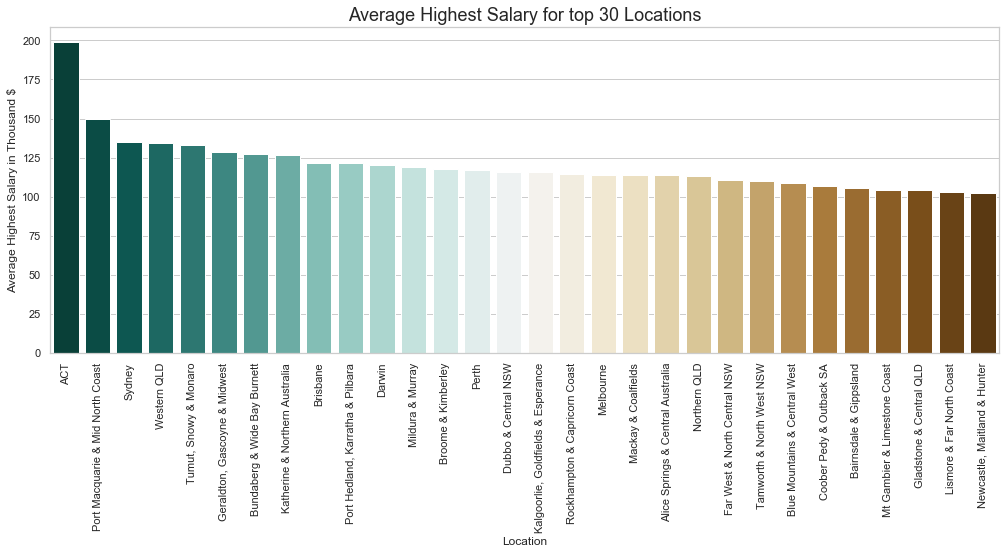

In [32]:
# Get the average lowest and highest salaries within each sector
df_salaries = df.groupby('Location').mean().reset_index()
df_salaries = df_salaries.sort_values(by='HighestSalary', ascending = False)[:30]

plt.figure(figsize=(17,6))
plt.title('Average Highest Salary for top 30 Locations',size=18)
bar_plt = sns.barplot(x='Location', y='HighestSalary', palette= sns.color_palette("BrBG_r", 30), data=df_salaries, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Location')
bar_plt.set_ylabel('Average Highest Salary in Thousand $')

plt.show()

<h3>Observation</h3>

In order to get an idea where employees are paid more well we are looking at the average of the 'HighestSalary' attribute of a job post for each distinct location, and are displaying the top 30 locations according to the best payrate in the barchart above.

<ul>
    <li>ACT has the highest salary average with almost 200,000, followed by Port Macquarie & Mild North Coast with an average of ~150.000 and Sydney, Western QLD and Tumut, Snowy & Monaro with an average of just over 125,000.</li>
    <li>The average of all other locations in the top 30 is between 100,000 and 125,000</li>
    <li>The only location of the top 5 locations for the biggest overall market share that does not appear in the top 30 for highest salary is Adelaide.</li>
    <li>Looking back at the pie chart to check for unexpected locations with high salaries, such as Port Macquarie, Western QLD and Tumut, we can see that the most popular job sector for these locations is Healthcare & Medical which may indicate why these locations have such high salaries.</li>
</ul>

#### Salary Distribution among top 30 locations for number of job postings

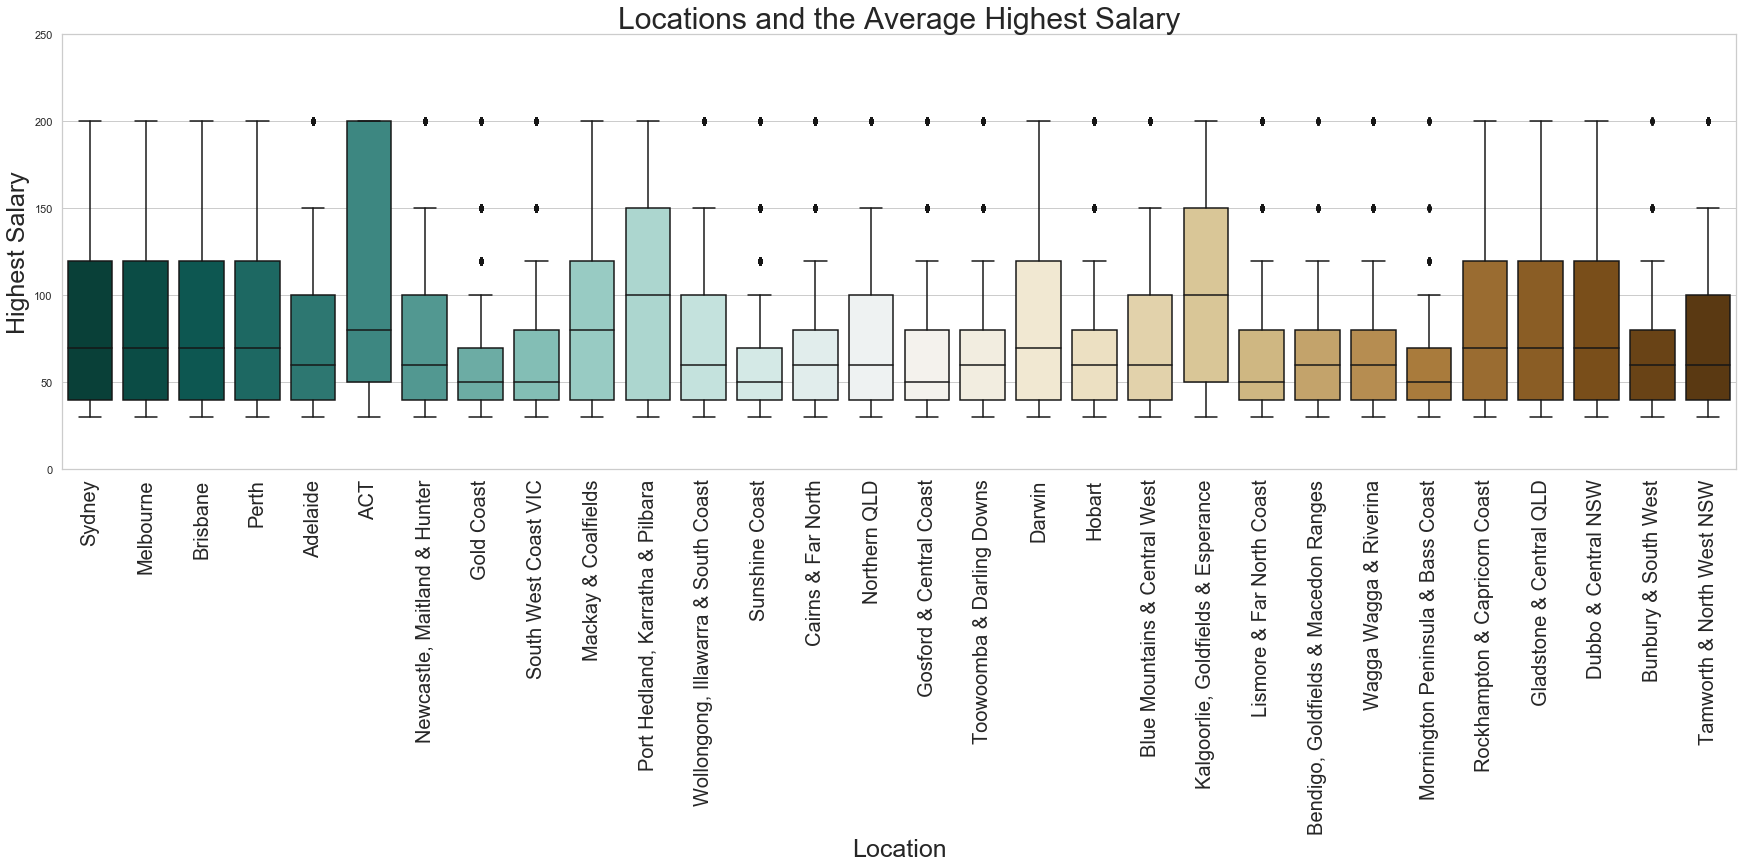

In [33]:
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

<h3>Observation</h3>
The Box and Whisker plot above gives a better view on the distribution of salaries by depicting  the five-number summary of the dataset, which includes the minimum, first quartile, median, third quartile, and maximum.
<ul>
    <li>Sydney, Melbourne Brisbane and Perth, which are also the top 4 cities for number of jobs postings, have an equal distribution of salaries.</li>
    <li>Adelaide is the only city out of the top 5 where the salary seems to be a little bit lower.</li>
    <li>The salary distribution for ACT is higher than for other locations with the third quartile being equal to the maximum.</li>
    <li>Port Hedland, Karratha & Pilbara and Kalgoorlie, Goldfields and Esperance show higher salaries compared to most other lcocations. Looking back at the pie chart above it can be seen that the top sector for both locations is Mining, Resources & Engery with 49.8% and 61.7% respectively, which may indicate that the sector is among the better paid ones.</li>
    <li>Gold Coast, Sunshine Coast and Cairns are amongst the places with the lowest salaries.</li>
</ul>

 Can we detect the pattern of posting: e.g. are more jobs posted at the beginning of month?

### Timeseries

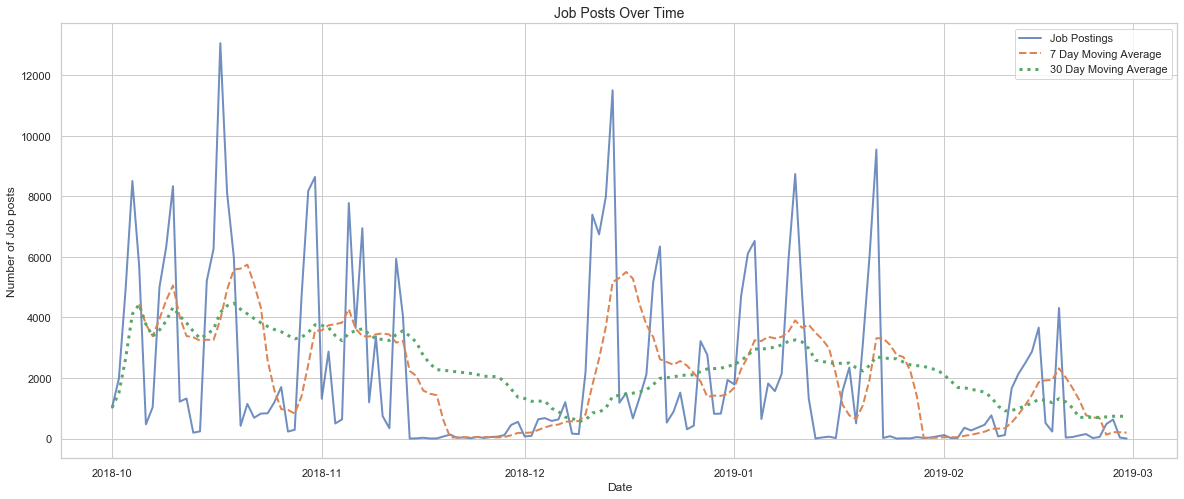

In [34]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

<h3>Observation</h3>

The time series above shows the number of job posts over time, including a moving average by week and month. However, trying to extract seasonality and predicting future trends did not prove to be useful, as the dataset ends mid-march and the number of job posts decreases towards the end of the dataset. This means that future predictions look are trending towards no job posts at all, which is unlikely to actually happen.

<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
</ul>

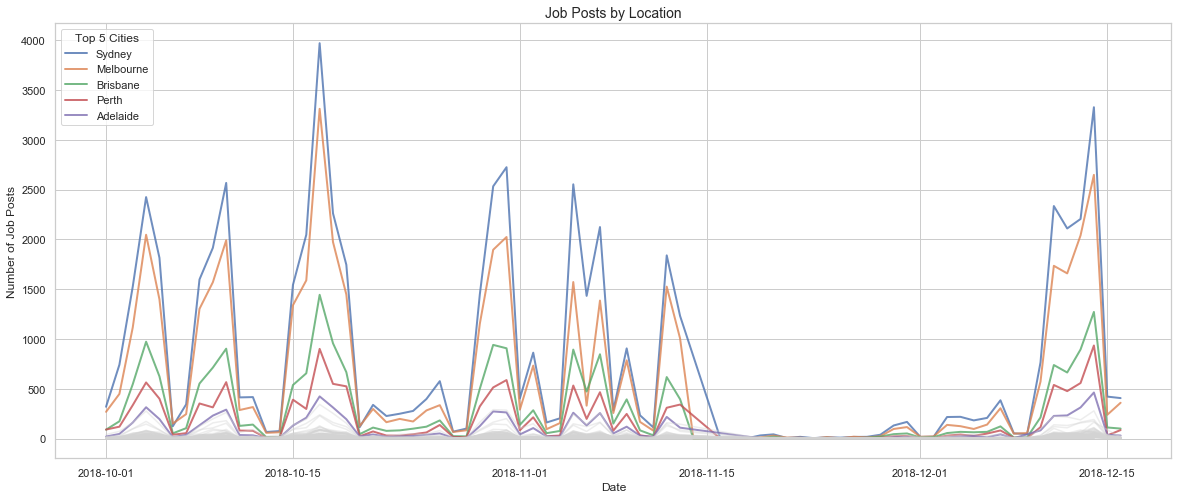

In [35]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

<h3>Observation</h3>

The time series above shows the number of job posts by location over time. As the values for location were missing from any job posts starting from the 16th of December 2018, the time series only covers a date range from the 1st of October 2018 - 15th December 2018. 

<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
</ul>

In [36]:
grouped_by_classification = df.groupby('Classification')
job_count_by_industry = pd.DataFrame(grouped_by_classification.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)


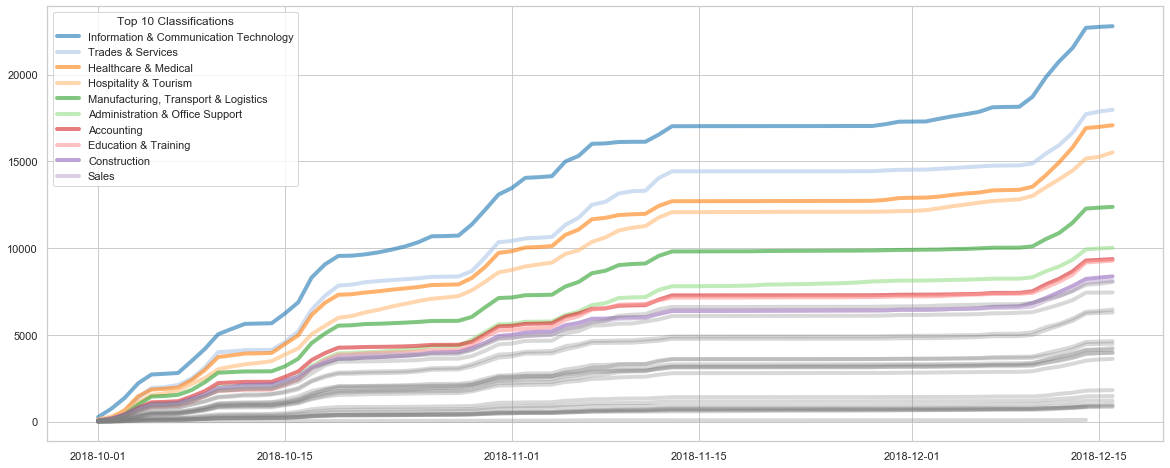

In [37]:
df_new = df[df['Classification'].isna()==False].groupby(['Date', 'Classification'])['Title'].count().reset_index()
df_running = df_new.groupby(['Classification','Date'])['Title'].sum().groupby(level=0).cumsum().reset_index()

df_running.columns = ['Classification', 'Date', 'RunningTotal']
df_running.set_index('Date', inplace=True)

top_10 = job_count_by_industry['Classification'][:10]
classifications = job_count_by_industry['Classification'][10:]
plt.figure(figsize=(20,8))
clrs = sns.color_palette("tab20", 10)
for i,c in enumerate(top_10):
    plt.plot(df_running[df_running['Classification']==c]['RunningTotal'], lw=4, color=clrs[i], alpha=0.6)
    
for i,cl in enumerate(classifications):
    plt.plot(df_running[df_running['Classification']==cl]['RunningTotal'], lw=4, color='grey', alpha=0.3)

plt.legend(job_count_by_industry['Classification'][:10], title='Top 10 Classifications', frameon=True)

plt.show()

### Observation

As we view the accumulating job posting per classification from October through to December, it's clear that generally speaking, each industry is growing and stagnating throughout the same periods of time. This being said, the rate at which the leading industries progress further ahead of their counterparts is apparent when viewing ICT, Trades & Services, Healthcare & Medical and Hospitality & Tourism

### Further attempts to extract seasonality or find a pattern of posting

In [38]:
temp = df[['Date']]
print("This may take a while...")
temp['DayOfMonth'] = temp['Date'].progress_apply(lambda x: pd.Series(x.day))
temp['DayOfWeek'] = temp['Date'].progress_apply(lambda x: pd.Series(x.dayofweek))
temp['Month'] = temp['Date'].progress_apply(lambda x: pd.Series(x.month))
temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))

## Retrieve truly unique days for averaging purposes
# Label days with their month so that truly unique days can be found
days = temp['Date'].progress_apply(lambda x: pd.Series("{}_{}".format(x.day, x.month)))
day_months = days.iloc[:, 0].unique()
unique_day_count = {}

# Get unique days that data was recorded via retrieving day and month of posting
for day in day_months:
    d_m = day.split('_')
    d = int(d_m[0])
    m = int(d_m[1])
    
    if(d in unique_day_count):
        unique_day_count[d] += 1
    else:
        unique_day_count[d] = 1

This may take a while...


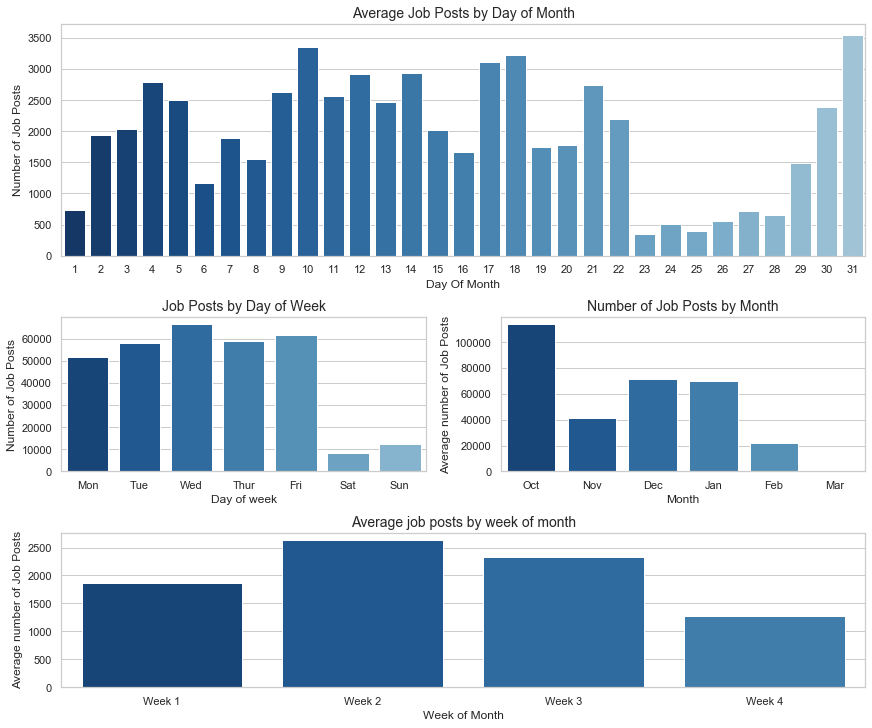

In [39]:
fig = plt.figure(constrained_layout=True, figsize=(12,10))
gs = fig.add_gridspec(3, 2, width_ratios=[1,1], height_ratios=[6,4, 4])

# Average by Day of Month
dayofmonth_counts = temp['DayOfMonth'].value_counts()

# Apply average
for day, count in dayofmonth_counts.items():
    dayofmonth_counts[day] = count / unique_day_count[day]

days = dayofmonth_counts.index

# Average by day of month    
fig_ax1 = fig.add_subplot(gs[0, :])
monthday_plt = sns.barplot(x=days, y=dayofmonth_counts, palette= sns.color_palette("Blues_r", 50), ax=fig_ax1)
fig_ax1.set_title('Average Job Posts by Day of Month', size=14)
monthday_plt.set_xlabel('Day Of Month')
monthday_plt.set_ylabel('Number of Job Posts')

# Number of posts by day of Week
weekdays_counts = temp['DayOfWeek'].value_counts()
weekdays = weekdays_counts.index

fig_ax2 = fig.add_subplot(gs[1, 0])
weekday_plt = sns.barplot(x=weekdays, y=weekdays_counts, palette= sns.color_palette("Blues_r", 12), ax=fig_ax2)
weekday_plt.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
fig_ax2.set_title('Job Posts by Day of Week', size=14)
weekday_plt.set_xlabel('Day of week')
weekday_plt.set_ylabel('Number of Job Posts')


# Number of job posts by month
months = [10, 11, 12, 1, 2, 3]
month_counter = Counter(temp['Month'])
month_counts = [month_counter[m] for m in months]

month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

fig_ax3 = fig.add_subplot(gs[1, 1])
month_plt = sns.barplot(x=month_labels, y=month_counts, palette= sns.color_palette("Blues_r", 12))
fig_ax3.set_title('Number of Job Posts by Month', size=14)
month_plt.set_xlabel('Month')
month_plt.set_ylabel('Average number of Job Posts')


# Average by week of month
# Get average postings by week of month
weeks = [0,0,0,0]
days_ordered_list = []

for i in range(1,32):
    days_ordered_list.append(dayofmonth_counts[i])

def avg(lst):
    return sum(lst) / len(lst)

weeks[0] = avg(days_ordered_list[:7])
weeks[1] = avg(days_ordered_list[7:14])
weeks[2] = avg(days_ordered_list[14:21])
weeks[3] = avg(days_ordered_list[21:])

week_labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4']

fig_ax4 = fig.add_subplot(gs[2, :])
month_plt = sns.barplot(x=week_labels, y=weeks, palette= sns.color_palette("Blues_r", 12))
fig_ax4.set_title('Average job posts by week of month', size=14)
month_plt.set_xlabel('Week of Month')
month_plt.set_ylabel('Average number of Job Posts')


plt.show();

In [40]:
monday_count = weekdays_counts[0]
wednesday_count = weekdays_counts[2]

wed_mon_ratio = wednesday_count / monday_count
# 1.2803326339294308

week2_count = weeks[1]
week4_count = weeks[3]

week4_week2_ratio = week2_count / week4_count
# 2.0555096941165973

<h3>Observation</h3>

Looking at the plots above, that show the number of job posts with respect to Day of the Month (average), Day of the Week, day of the Month and finally by Week of the month (average), there are a few noteworthy observations that we can make:

- Jobs are 28% more likely to be posted on a Wednesday, than they are on a Monday.
- Jobs are twice as likely to be posted in the second week of each month, than they are in the last week.
- Despite the final week of the month being the most bare for job postings, the postings rapidly spike for dates of the 29th, 30th and 31st. So much so, that the 31st has the highest average of postings across the month. This could be in relation to job posting KPI's that recruiters and recruitment agencies may have.
 
Additionally, through visible observation we have found the following insights
<ul>
    <li>The lowest number of jobs are posted between the 23rd and 28th of every month </li>
    <li>The vast majority of jobs are posted on weekdays, with only a few jobs being posted on weekend days.</li>
    <li>The jobs posted in the month of October dwarfs the remaining months included in the analysis.</li>
    <li>Little to no meaningful data can be extracted in the scope of March as the dataset does not cover the full month.</li>
</ul>

<h2>Timing Summary</h2>
<br>
<p>Overall and as expected, the larger cities like Sydney, Melbourne, Brisbane, Perth and Adelaide have the most number of job postings in Australia, however, depending on the job sector, some remote/rural locations like Port Hedland, Mackay and Kalgoorlie are popular locations with competitive salaries.</p>
<p>Job postings are most commonly created on Wednesdays, followed by Fridays. Job postings spike sharply in the final few days of the month. The second week of each month has the strongest average job posting count.</p>

 

_________________________________________________________________________________________________________


# Study of market by Sectors

## View volume of job postings per classification

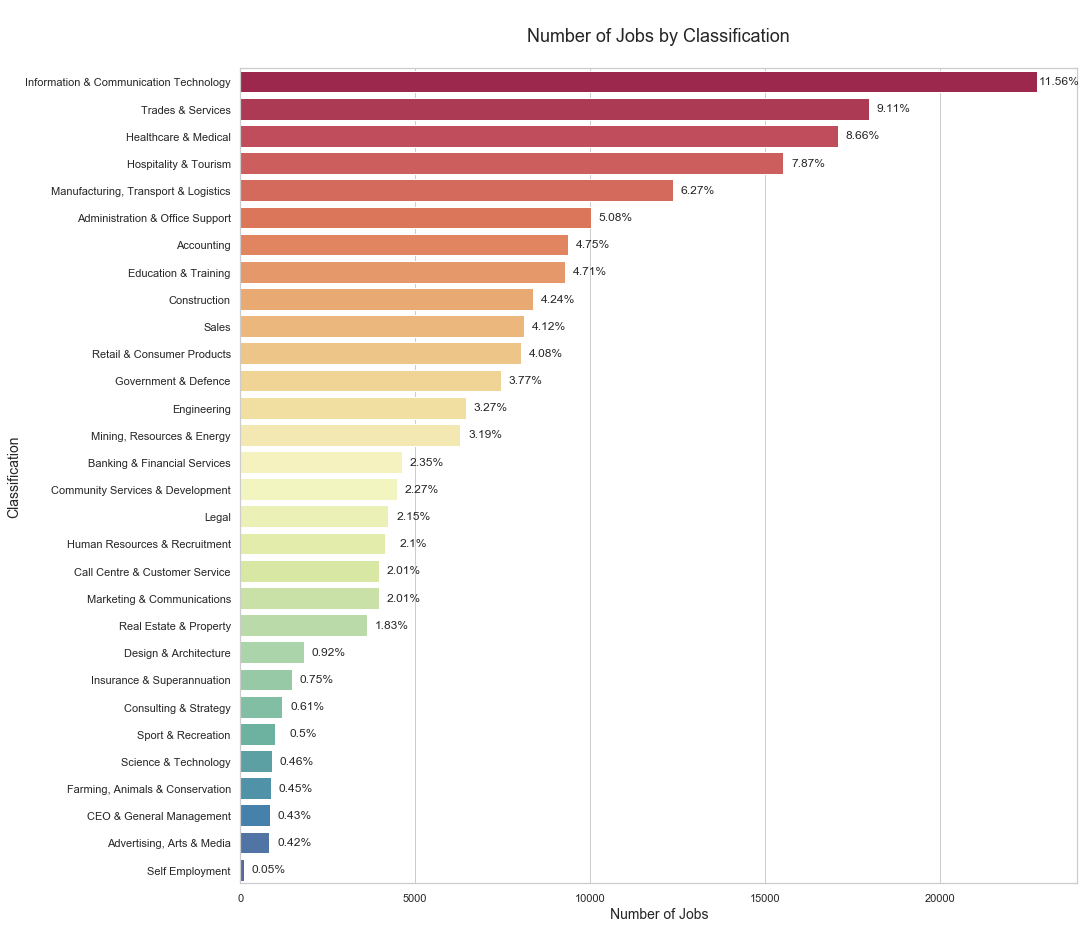

In [41]:
grouped_by_classification = df.groupby('Classification')
job_count_by_industry = pd.DataFrame(grouped_by_classification.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)

# Calculate percentages of each bar
total_job_count = sum(job_count_by_industry['Jobs'])
labels = [round((x/total_job_count) * 100,2) for x in job_count_by_industry['Jobs']]

# Plot barplot
plt.figure(figsize=(15,15))
splot = sns.barplot(x=job_count_by_industry['Jobs'], y=job_count_by_industry['Classification'], palette='Spectral')
plt.title('\nNumber of Jobs by Classification\n',size=18)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Classification', fontsize=14)

# Add percentages as text on barplot
for i, p in enumerate(splot.patches):
    _x = p.get_x() + p.get_width() + 1200
    _y = p.get_y() + p.get_height() / 2 + 0.1
    value = "{}%".format(labels[i])
    splot.text(_x, _y, value, ha="right")

color_by_classification = dict()
index = 0
for i, row in job_count_by_industry.iterrows():
    color_by_classification.update({row['Classification'] : splot.patches[index].get_facecolor()})
    index += 1

plt.show()

<h3>Observation</h3>

<ul>
    <li>There are 30 different job classifications.</li>
    <li>The top classification, with a share of 11.56% is Information & Communication Technology, followed by Trades & Services, Healthcare & Medical, Hospitality & Tourism and Manufacturing, Transport & Logistics.</li>
    <li>The job classification with the lowest share is Self Employment with 0.05%, followed by Advertising, Arts & Media, CEO & General Management and Farming, Animals & Conservation</li>
</ul>

In [42]:
locations = df['Location'].dropna().unique()
classifications = df['Classification'].dropna().unique()
df_location = pd.DataFrame({"Location":locations})

In [43]:
# Groups what would be small pie slices into an 'others' group
def group_locations(thr, df):
    '''Needs to have a "Count" column'''
    
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()
               
    others['Location'] = 'Others'
    return above_threshold.append(others, ignore_index=True)


<div id="_group_b_container"></div>

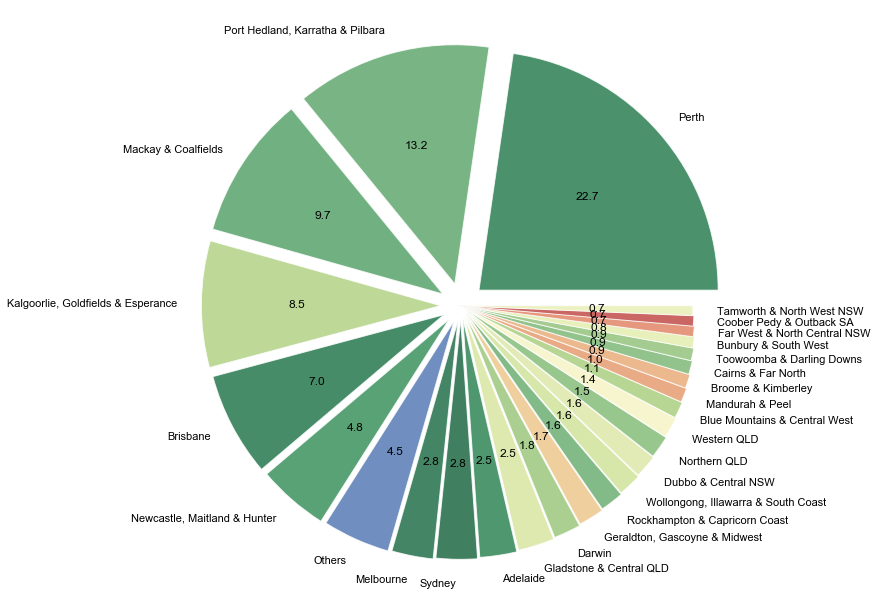

<function __main__.update(Classification='Mining, Resources & Energy')>

In [44]:
def update(Classification='Mining, Resources & Energy'):
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111)
    
    
    #get total count of jobs for each classification (for current location only)
    df_location['Count'] = df_location['Location'].apply(lambda x: pd.Series(len(df[(df['Classification']==Classification)&(df['Location']==x)])))
    plot_df = df_location.sort_values(by="Count", ascending=False).reset_index()
    #group the classifications that have < 1% together into 'others' category
    plot_df = group_locations(0.5, plot_df)
    plot_df = plot_df.sort_values(by="Count", ascending=False)

    explode = [0.1-x*0.005 for x in range(len(plot_df))]
    clrs = plot_df.sort_values(by="Count", ascending=False).reset_index()['Location'].apply(lambda x: color_by_location.get(x))
    p, texts, autotexts = ax.pie(plot_df['Count'],colors=clrs,explode=explode, labels=plot_df['Location'], wedgeprops={'alpha':0.8},autopct='%1.1f')

    for t in texts:
        t.set_color('black')
    for t in autotexts:
        t.set_color('black')
        t.set_size(12)
    plt.show()

interact(update, Classification=classifications)

<h3>Observation</h3>

<ul>
    <li>Sydney and Melbourne are the most popular location for most job classifications. </li>
    <li>For Mining, Resources & Energy, Perth is the location with most postings with 22.7%, followed by Port Hedland, Karratha & Energy, Mackay & Coalfields and Kalgoorlie, Goldfields & Esperance.</li>
    <li>Some job sectors, such as Farming, Animals & Conservation are distributed evenly across a large number of locations, while other job sectors, such as Accounting, are concentrated around a low number/specific locations, which are mostly the top locations by number of job posts. </li>
</ul>

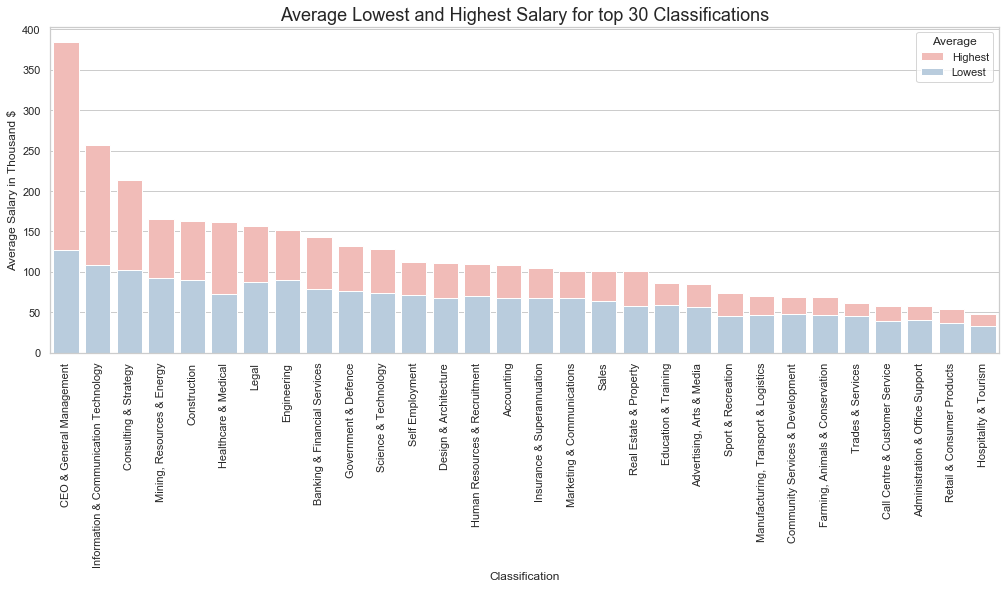

In [45]:
# Get the average lowest and highest salaries within each sector
df_salaries = df.groupby('Classification').mean().reset_index()
df_salaries = df_salaries.sort_values(by='HighestSalary', ascending = False)[:30]

# Assign a label to a new column to indicate whether the Average refers to highest or lowest salary
df_lowest = df_salaries[['Classification', 'LowestSalary']]
df_highest = df_salaries[['Classification', 'HighestSalary']]
df_lowest['Salary Category'] = 'Lowest'
df_highest['Salary Category'] = 'Highest'

# Rename columns
df_lowest.columns = ['Classification', 'AverageSalary', 'Salary Category']
df_highest.columns = ['Classification', 'AverageSalary', 'Salary Category']

# Combine into single dataframe
df_salaries = df_highest.append(df_lowest).reset_index(drop=True)

# Sort values and plot
df_salaries.sort_values(by='AverageSalary',ascending=False,inplace=True)

plt.figure(figsize=(17,6))
plt.title('Average Lowest and Highest Salary for top 30 Classifications',size=18)
bar_plt = sns.barplot(x='Classification', y='AverageSalary', hue='Salary Category', palette='Pastel1', data=df_salaries, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Classification')
bar_plt.set_ylabel('Average Salary in Thousand $')
bar_plt.legend(title='Average')#,frameon=True)

plt.show()

<h3>Observation</h3>
The bar chart above displays the average for lowest and highest salaries for each of the 30 Classifications.

<ul>
    <li>CEO & General Management has significantly higher salaries, with an upper average of almost 400,000 AUD, which is followed by Information & Communication Technology with a highest salary average of 250,000 AUD.</li>
    <li>Among the classifications with the lowest average salaries are Hospitality & Tourism, Retail & Consumer Products, Administration & Office Support and Call Centre & Customer Services. </li>
    <li>While Trades & Services was among the top 5 classifications for number of job posts, it is the 5th lowest classification by salary.</li>
    <li>Another observation that can be made from this chart is the range of salaries from lowest to highest average. For example, it can be seen that the lowest average for CEO & General Management is still above the highest average for all other classifications.</li>
    <li>The range of salaries from lowest average to highest average quite large for the top paying classifications and decreases as the salary average decreases. While a CEO or General Manager may be able to progress their salary throughout their career, someone working in Hospitality & Tourism does not have much opportunity to increase their salary. </li>
</ul>

#### The pie charts below can be used to get some more detailed insights into the number of job posts for each salary range and job type, specific to a chosen classification

<div id="_group_c_container"></div>

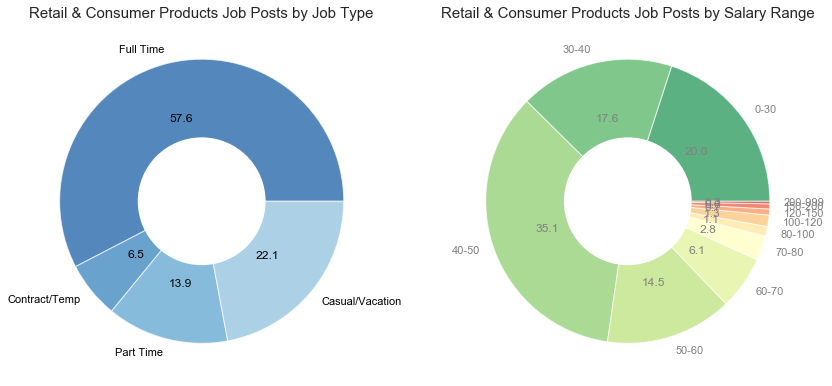

In [46]:
jobtypes = df['JobType'].dropna().unique()
df_jobtype = pd.DataFrame({"JobType": jobtypes})

classifications = df['Classification'].dropna().unique()

low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])

def update(Classification):
    #create layout
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,14))
    
    df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[(df['LowestSalary']==x) & (df['Classification']==Classification)]))
    df_jobtype['Count'] = df_jobtype['JobType'].apply(lambda x: pd.Series(len(df[(df['JobType']==x) & (df['Classification']==Classification)])))
    
    #salary ranges plot
    p, texts, autotexts = ax1.pie(df_salary_ranges['Count'], colors=sns.color_palette("RdYlGn_r", len(df_salary_ranges)),labels=df_salary_ranges['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
    ax1.title.set_text(Classification +' Job Posts by Salary Range')
    ax1.title.set_size(15)

    # add centre circle to make it a donut
    centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
    ax1.add_patch(centre_circle)

    for t in texts:
        t.set_color('gray')
    for t in autotexts:
        t.set_color('gray')
        t.set_size(12)

    #jobtype plot    
    p2, texts2, autotexts2 = ax2.pie(df_jobtype['Count'], colors=sns.color_palette("Blues_r"),labels=df_jobtype['JobType'],wedgeprops={'alpha':0.7},autopct='%1.1f')
    ax2.title.set_text(Classification +' Job Posts by Job Type')
    ax2.title.set_size(15)

    # add centre circle to make it a donut
    centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
    ax2.add_patch(centre_circle2)

    for t in texts2:
        t.set_color('black')
    for t in autotexts2:
        t.set_color('black')
        t.set_size(12)

    plt.show()

interact(update, Classification=classifications);

<h3>Observation</h3>

<ul>
    <li>Casual/Vacation jobs are popular in sectors such as Retail & Consumer Products (22.1%), Hospitality & Tourism (34.1%), Community Services & Development and Sport & Recreation</li>
    <li>Apart from Self Employment, where contract/temporary is the job type with most job posts (62.9%), the most popular job type for all other classifications is Full Time.</li>
    <li>Contract & Temporary jobs are mostly offered for Self Employment, with 62.9% of all job posts, and IT, with 46.5% of all job offers.</li>
    <li>The best job sectors to find part time work are Sport & Recreation(15.4%), Community Services & Development(19.6%), Education & Training (17.7%), Healthcare & Medical(18.8%) and Hospitality & Tourism(17.7%)</li>
</ul>

<div id="_group_d_container"></div>

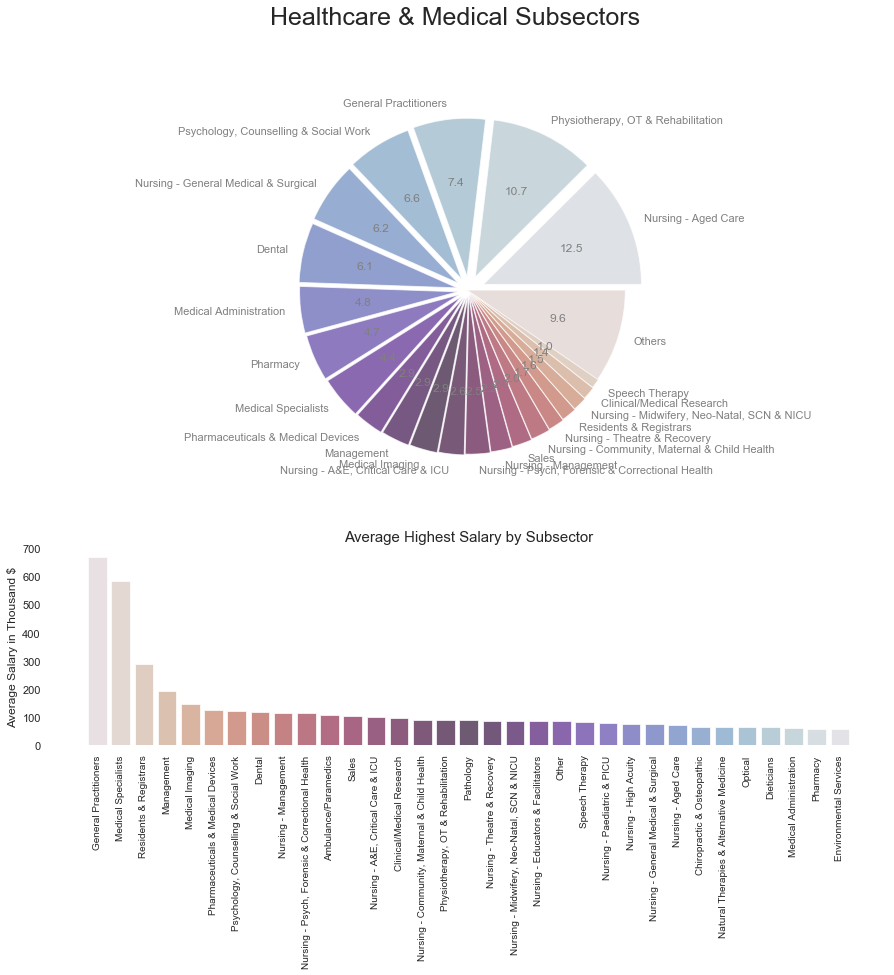

In [47]:
classifications = df['Classification'].dropna().unique()


# Get interactive
def update(Classification="Healthcare & Medical"):
    
    fig, (ax_pie, ax_bar) = plt.subplots(2, 1, sharey=False, figsize=(15,12), gridspec_kw={'height_ratios': [6, 3]})
    
    #for pie chart
    counts = df[df['Classification']==Classification]['SubClassification'].value_counts()
    index = counts.index
    
    df_subclass_pie = pd.DataFrame({"SubClassification":index, "Count":counts})
    pie_df = group_others(1, df_subclass_pie)
    
    explode = [0.1-x*0.005 for x in range(len(pie_df))]
    clrs = sns.color_palette("twilight", n_colors = len(pie_df))
    p,texts, autotexts = ax_pie.pie(pie_df['Count'],colors=clrs,explode=explode,labels=pie_df['SubClassification'],wedgeprops={'alpha':0.7},autopct='%1.1f')
        

    for t in texts:
        t.set_color('grey')
    for t in autotexts:
        t.set_color('grey')
        t.set_size(12)

    #for bar chart
    df_subclass = df[(df['Classification'] == Classification) & (df['SubClassification'].isna()==False)]
    df_plot = df_subclass.groupby('SubClassification').mean().reset_index().sort_values(by="HighestSalary", ascending=False)
    ax_bar.grid(b=None)
    bars = ax_bar.bar(df_plot['SubClassification'], df_plot['HighestSalary'], color=sns.color_palette('twilight_r', n_colors=len(df_plot)), alpha=0.7)
    ax_bar.set_xticklabels(df_plot['SubClassification'],rotation=90,fontsize=10)
    for s in ax_bar.spines:
        ax_bar.spines[s].set_visible(False)
    
    fig.suptitle(Classification + " Subsectors", size=25)
    ax_bar.set_ylabel("Average Salary in Thousand $")
    ax_bar.title.set_text('Average Highest Salary by Subsector')
    ax_bar.title.set_size(15)
    
    
interact(update, Classification=classifications);


<h3>Observation</h3>

<p>Many of the Classifications seen above have a stable spread of classification share and average highest salary. No strong conclusions are being drawn from the above however there are a few noteworthy observations:</p>
<ul>
    <li>Advertising, Arts & Media: Notably higher pay for performing arts & management sub-classifications</li>
    <li>Sports & recreations: dominated by personal trainers</li>
    <li>CEO & General Management: sub-classifications consistently achieving large highest salary's</li>
    <li>Government & Defence: State government roles wildly outnumber federal, local, etc. </li>
    <li>General Practitioner, which is the 3rd most popular subsector of Healthcare&Medical, is one of the highest paid jobs with an Average Highest Salary of almost 700,000 AUD. However, the most popular subsector in Healthcare&Medical is Aged Care Nursing, followed by Physiotherapy, OT & Rehabilitation.</li>
    <li>The highest paid subsector for Banking&Finance is Corporate Finance & Investment Banking with a Highest Average of almost 300,000, however, only 3.5% of jobs in the Banking sector fall under this subsector. The most popular subsectors for the Banking industry are Compliance&Risk (15.6%), Financial Planning(12.7%) and Banking-Retail/Branch (11.2%).</li>
    <li>The best paying subsector in Information & Communication Technology is for Architects with over 400,000 AUD, followed by Programme & Project Management, Management, Consultations and Business Analysts. Developers/Programmers has the most number of job posts within IT with a share of 18.5%, followed by Business/Systems Analyst (13.1%) and Programme & Project Management (10.6%)</li>
</ul>

# Textual analysis - requirements extraction for each sector

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

<div id="_group_e_container"></div>

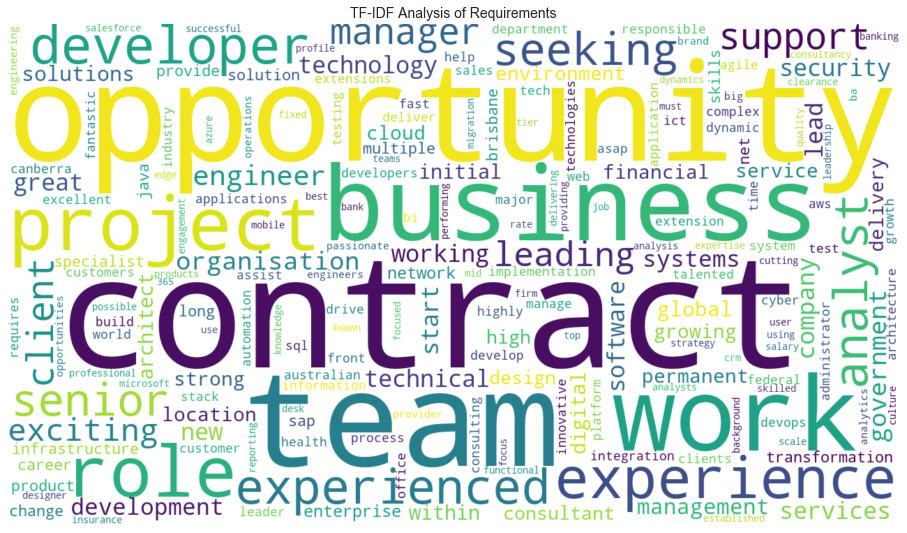

<function __main__.update(Classification='Information & Communication Technology')>

In [49]:
def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)


<h3>Observation</h3>

<ul>
    <li>Team work and experience are highly valued in all job sectors.</li>
    <li>Much of the job postings textual real estate is dominated by words that directly reference the industry itself.</li>
    <li>Common use of the "time", possibly inflated due to reference to non-skill related terms such as [part time, full time etc.]</li>
    <li>Common use of the "senior", possible contributions from senior positions themselves, and the interaction a non-senior position would require with seniors</li>

</ul>

# Part 3: Evaluation

<h1>Hypothesis recap</h1>

<ul>
    <li>We expect the vast majority of jobs to be concentrated along the coast lines of Australia, particularly the East Coast, in accordance with the population distribution. Specific locations that we expect to hold a large share of the market are major cities such as Sydney, Melbourne, Brisbane, Adelaide and Perth.<br><br>
    <li>We suspect that the major classifications in Australia include IT, due to the increasing amount of technology being developed and used, and Tourism, as Australia is a popular holiday spot. Other classifications that may stand out could be Farming and Agriculture as those are quite large industries in Australia, as well as Mining. However, the latter would rather be concentrated inland and in remote locations. Furthermore, many businesses in the Agricultural industry are often family based and find employees through 'word of mouth' which means the amount of job posts may not accurately represent the size of the industry/number of jobs available.<br><br>
    <li>The jobs that we suspect to have high salaries include jobs in the IT industry, Health, management positions, government jobs and mining jobs.<br><br>
    <li>As we suspect larger cities to have a larger demand for employees, we would expect the salary in those locations to be higher/more competitive as well.<br><br>

<h2>What are the findings of your data analytics</h2>
<ul>
    <li>As hypothesised, our findings reveal that larger cities have the vast majority share of job postings across the board.<br><br>
    <li>The SE & East Coast of Australia, yielding the largest population counts in general, are true hotspots for job postings, with inland & West Coast roles further illustrating this correlation by declining in job post counts with the population itself.<br><br>
    <li>Regarding the most popular job sectors, the hypothesis that IT and Tourism are amongst the top sectors has proven to be true, however, the expectation that farming would be a popular job sector did not hold as true.<br><br>
    <li>An unexpected result we encountered was that Trades & Services ranked 2nd for number of job posts by classification. This is promising for school leavers with less interest in pursuing higher studies.
    

<h2>What actions for balancing the markets do you suggest based on your findings?</h2>
<ul>
    <li>Geographically, the government could consider offering subsidisations or grants to promote employment in rural areas, this could lead to the overall development of Australia as a country, while increasing the amount of points of failure for our economy. (E.g, the current climate (CoViD) has completely shut down cities whilst some smaller population geographies felt the effects less).<br><br>
<li>As the IT industry is clearly pulling away from many sectors, it suggests that the world moving forward is becoming ever more reliant on technology itself. In the interest of balancing the markets, the promotion of IT throughout the core curriculum of our next generation could see IT related skills being as common in our workforce as basic mathematics. If the new generation of Australians can be technologists first, they can bring the growth, automation and other benefits IT brings to a range of industries. This could redistribute the growth by, in essence, sharing the success of IT across the board <br><br>

<h2>How could you refine your data analytics?</h2>

<ul>
    <li>Our analysis could have been improved through the introduction of additional data sources to the dataset. If data from sites such as LinkedIn, CareerOne and Indeed could be retrieved, cleaned and correctly integrated into our Seek data, our observations could either be strengthened or reconsidered, at which point further analysis could be made on the job posting sites themselves. <br><br>

    
<li>Population data and more accurate location boundaries could have allowed for accurate normalization of analytics, geographically, as observations were often made in reference to the largest of Australia's locations. This addition could bring greater appeal to this study to remote job seekers, adding a higher degree of accuracy for their own observations<br><br>

<li>As Australia and the world is currently experiencing drastic changes to their economy, this study should be reconducted with more recent data both at the time of reading and iteratively until the economy stabilises once again, to provide readers with accurate insights.

<h2>Implications for employers and employees</h2>

<ul>
    <li>Employers could capitalise on the knowledge that certain days (weekends) have less postings but not necessarily less viewers. When jobs are searched via recency, certain days are less competitive to remain 'recent'<br><br>
<li>Employees can utilise the provided word clouds to make a quick assessment of whether they are exhibiting the most in-demand skills that their industry seeks.<br><br>
<li>Both employers and employees can refer to these salary analytics to consider how competitive their current agreement is, also to assess potential in future.<br><br>
<li>Employees can refer to the time-series analyses to assess the growth that their industry is achieving or to assess what a prosperous career transition could look like, at the level of sub-classification<br><br>
<li>Due to most jobs being offered in large citites, a job seeker may have to relocate and move to a different location, particularly people that live in remote/rural areas of the country. At the same time, competition in larger citites may be much higher when applying for jobs.<br><br>
<li>Similarly, employers in rural/remote areas of Australia may have difficulties filling all job positions due to the lower population and more job opportunities in citites.<br><br>